# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib as mpl

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count_by_type.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_by_ride = pyber_data_df.groupby(["type"]).sum()["fare"]/ride_count_by_type
avg_fare_by_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"]/driver_count_by_type
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_dict = {
    "Total Rides" : ride_count_by_type,
    "Total Drivers" : driver_count_by_type,
    "Total Fares" : total_fare_by_type,
    "Average Fare per Ride" : avg_fare_by_ride,
    "Average Fare per Driver" : avg_fare_per_driver
}
pyber_summary_df = pd.DataFrame.from_dict(pyber_dict)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  8. Format the columns.
#df[column].map('{:,d}'.format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)

pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df_copy = pyber_data_df.copy(deep = True)
pyber_data_df_copy['date'] = pd.to_datetime(pyber_data_df_copy["date"]).dt.date
pyber_data_df_copy['date'] = pd.to_datetime(pyber_data_df_copy["date"], format="%Y-%m-%d")
#pyber_data_df_copy['date'] = pyber_data_df_copy["date"].dt.date
pyber_data_df_copy.head()
#pyber_data_df_copy.dtypes

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban


In [13]:
total_fares_by_type_date = pyber_data_df_copy.groupby(["type", "date"]).sum()["fare"]
total_fares_by_type_date.head(10)

type   date      
Rural  2019-01-01    43.69
       2019-01-02    52.12
       2019-01-03    19.90
       2019-01-04    24.88
       2019-01-06    47.33
       2019-01-08    19.39
       2019-01-09    31.84
       2019-01-11    16.42
       2019-01-14    72.15
       2019-01-15    30.26
Name: fare, dtype: float64

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# pyber_data_df = pyber_data_df.reset_index()
pyber_data_df_copy = pyber_data_df_copy.reset_index(drop = True)
pyber_data_df_copy.dtypes

city                    object
date            datetime64[ns]
fare                   float64
ride_id                  int64
driver_count             int64
type                    object
dtype: object

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = pd.pivot_table(pyber_data_df_copy, index="date", columns = "type" , values = "fare", aggfunc=np.sum)
#pyber_data_df_copy_1 = pyber_data_df_copy.pivot(index="date", columns = "type" , values = "fare")
pivot_df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
2019-01-06,47.33,62.63,202.40
2019-01-07,NaN,155.01,218.02
2019-01-08,19.39,56.82,379.79
2019-01-09,31.84,150.67,231.34


In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
#pivot_loc = pivot_df.loc['2019-01-01':'2019-04-29']
pivot_loc = pivot_df.loc[pivot_df.index < "2019-04-29",:]
pivot_loc.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-24,NaN,220.72,312.64
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30
2019-04-28,NaN,188.71,328.78


In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

#-- Pooja -- already changed type to datetime in earlier step-----

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 118 entries, 2019-01-01 to 2019-04-28
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     73 non-null     float64
 1   Suburban  117 non-null    float64
 2   Urban     118 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [19]:
pivot_loc.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89


In [20]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_resample_W = pivot_loc.resample("W").sum()
pivot_resample_W.tail()

type,Rural,Suburban,Urban
date,,,
2019-03-31,199.42,1045.06,1942.77
2019-04-07,501.24,1010.73,2356.70
2019-04-14,269.79,784.82,2390.72
2019-04-21,214.14,1149.27,2303.80
2019-04-28,191.85,1357.75,2238.29


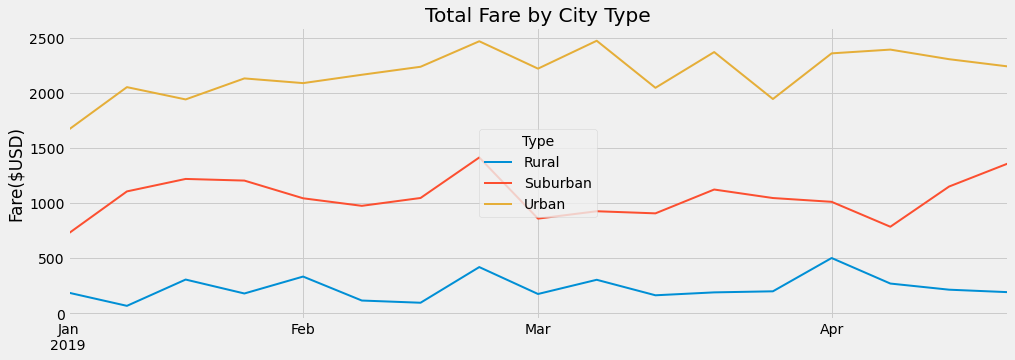

In [22]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
pivot_resample_W.plot(linewidth = 2, 
                      figsize=(15, 5), 
                      title = "Total Fare by City Type", 
                      ylabel = "Fare($USD)", 
                      xlabel = "")
plt.legend(loc = "center", title = "Type")

# save graph the analysis folder
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()